Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('bhp.csv')
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12221,other,3 BHK,2000.0,3.0,200.0,3,10000
951,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3,11594
7429,Malleshwaram,2 BHK,900.0,2.0,90.0,2,10000
9525,Balagere,2 BHK,1210.0,2.0,82.0,2,6776
3539,Kasavanhalli,2 BHK,1115.0,2.0,50.0,2,4484


In [7]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


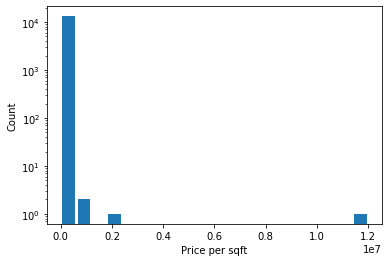

In [43]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## Finding Max and Min Threshold

In [20]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000099)

In [21]:
df[df.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [22]:
df[df.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [23]:
df[df.price_per_sqft < min_threshold].shape, df[df.price_per_sqft > max_threshold].shape

((14, 7), (14, 7))

In [24]:
df2 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df2.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8282,Sarjapur,2 BHK,1032.0,2.0,42.0,2,4069
8176,Hennur,2 BHK,1255.0,2.0,55.5,2,4422
11343,Hennur,2 BHK,1255.0,2.0,54.5,2,4342
10985,other,3 BHK,1451.0,3.0,68.0,3,4686
4559,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173


#### Now checking how many outliers have been removed

In [44]:
df.shape[0] - df2.shape[0]

28

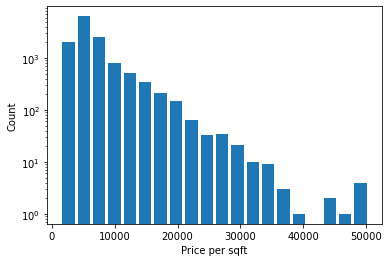

In [40]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

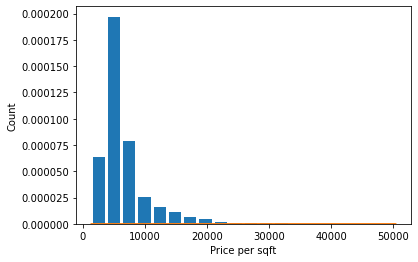

In [35]:
from scipy.stats import norm
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, norm.pdf(rng, df2.price_per_sqft.mean(), df2.price_per_sqft.std())))

## Finding Upper Limit and Lower Limit using 4 standard deviation

In [47]:
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
upper_limit

23227.73653589429

In [48]:
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
lower_limit

-9900.429065502549

In [51]:
df2[df2['price_per_sqft'] < lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [54]:
df2[df2['price_per_sqft'] > upper_limit].sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058
3128,Malleshwaram,4 Bedroom,5500.0,5.0,1500.0,4,27272
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
3500,Kundalahalli,1 BHK,2400.0,1.0,650.0,1,27083
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352


In [56]:
df3 = df2[(df2.price_per_sqft > lower_limit) & (df2.price_per_sqft < upper_limit)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


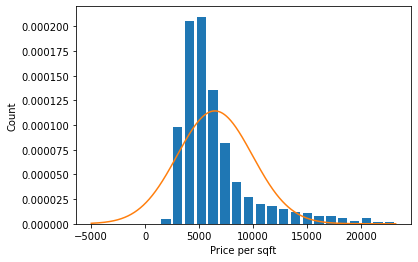

In [62]:
plt.hist(df3.price_per_sqft, rwidth=0.8, bins=20, density=True)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

## Z Score

In [37]:
df4 = df
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [38]:
df4['z-score'] = (df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()

In [68]:
df4[df4['z-score'] > 4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067


In [69]:
df4[df4['z-score'] < -4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score


In [71]:
df5 = df4[(df['z-score'] > -4) & (df['z-score'] < 4)]

In [72]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390


In [75]:
df4.shape[0] - df5.shape[0]

4